In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

In [5]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report

In [6]:
df=pd.read_csv('C:/Users/Sushree Jena/Desktop/happymonk/breastCancer.csv')

In [7]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
#Checking data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [9]:
#Summary Statistics

df.describe()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [10]:
#Checking for missing values

df.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [11]:
#Dropping the id column since we don't require it for model building

df=df.drop('id',axis=1)

In [12]:
#Target class counts

df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [13]:
#As per the dataset, 2 represents benign and 4 refers to malignant. Let's convert it to 0 and 1 for easy understanding

df['class']=df['class'].replace({2:0,4:1})

In [14]:
df['bare_nucleoli'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [15]:
#As per the dataset, ? represents 'not available' case. So, let's replace '?' with 0

df['bare_nucleoli']=df['bare_nucleoli'].replace({'?':'0'})

In [16]:
#Converting the datatype from string to int

df['bare_nucleoli']=df['bare_nucleoli'].astype('int')

In [17]:
df.columns

Index(['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

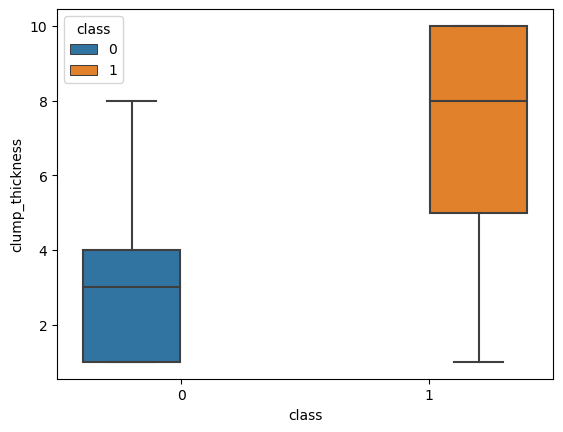

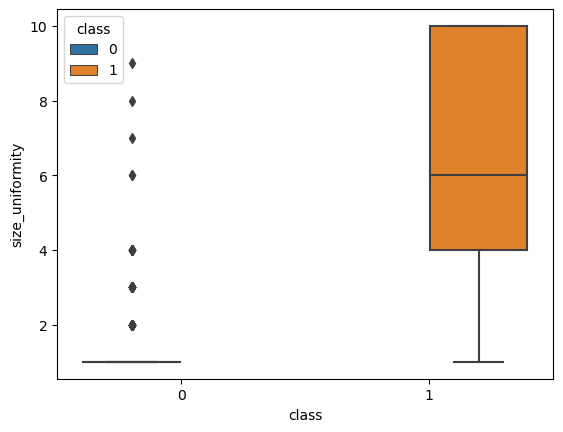

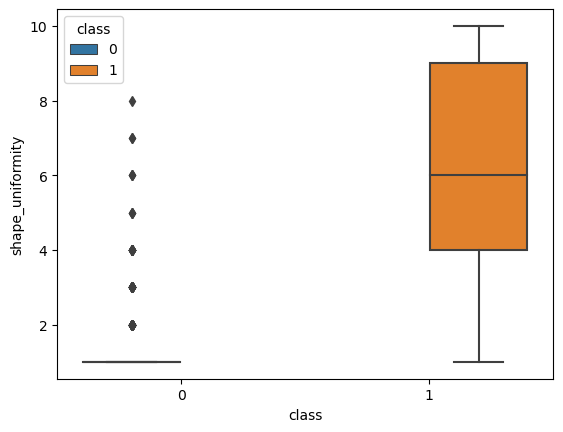

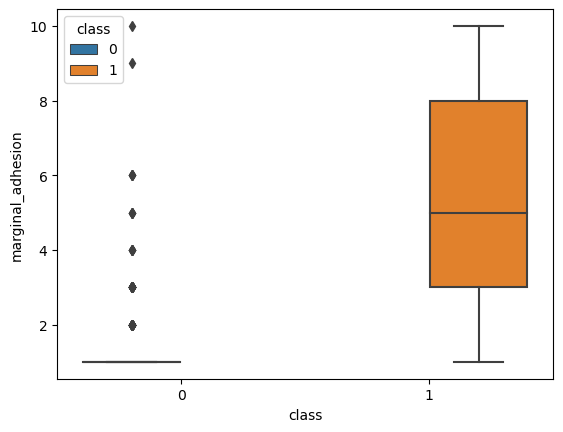

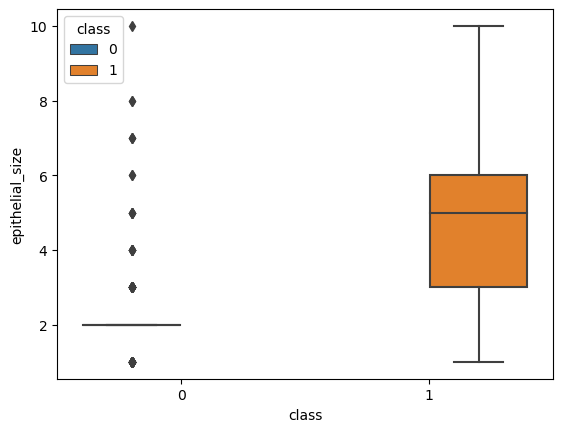

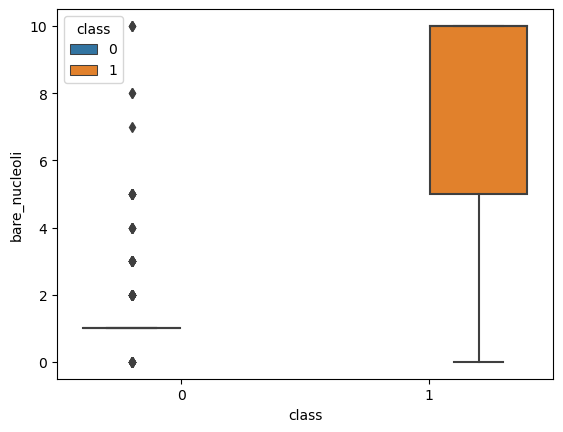

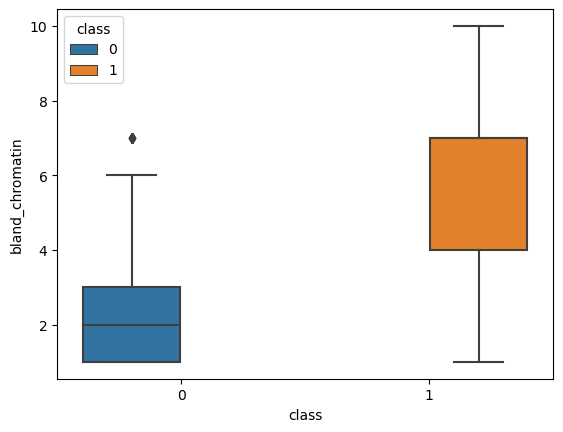

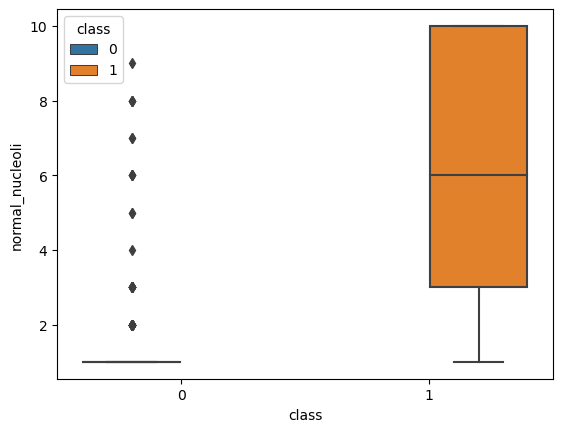

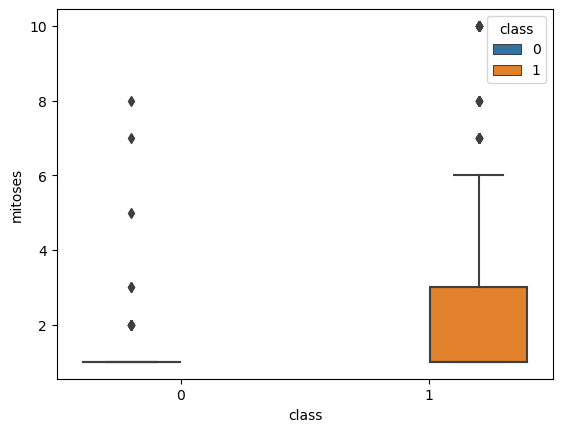

In [18]:
#Checking for outliers

cols=['clump_thickness', 'size_uniformity', 'shape_uniformity','marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
      'bland_chromatin', 'normal_nucleoli', 'mitoses']

for col in cols:
    sns.boxplot(x='class',y=df[col],data=df,hue='class')
    plt.show()

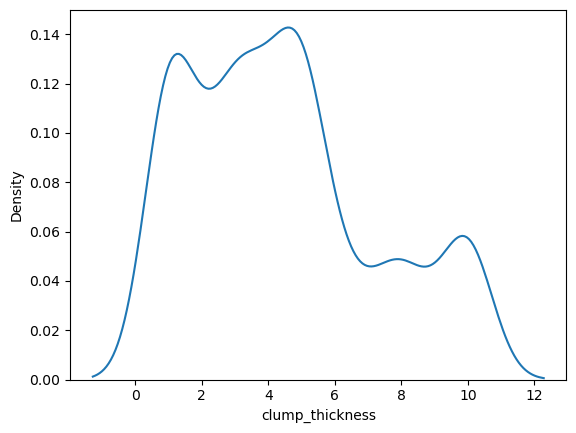

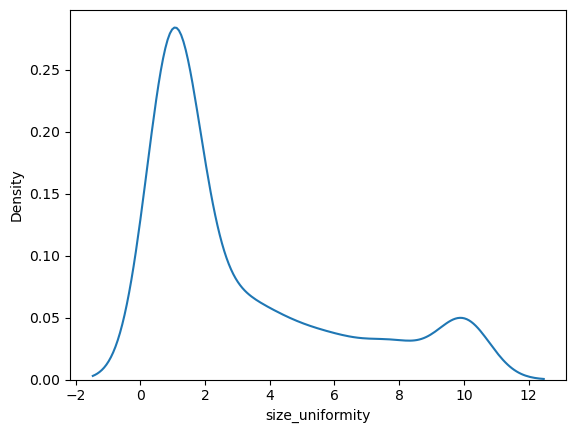

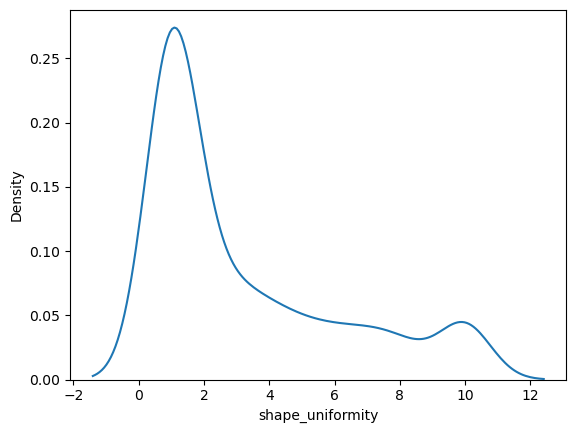

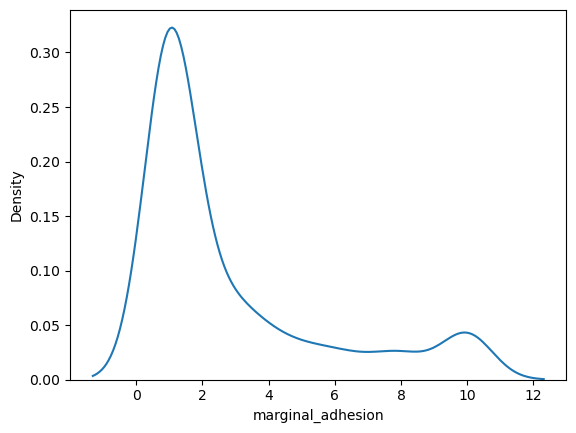

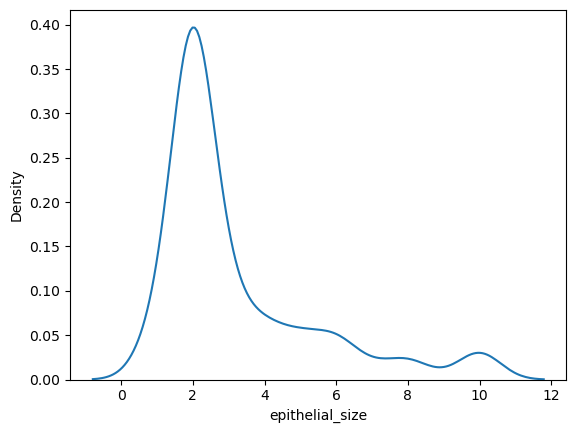

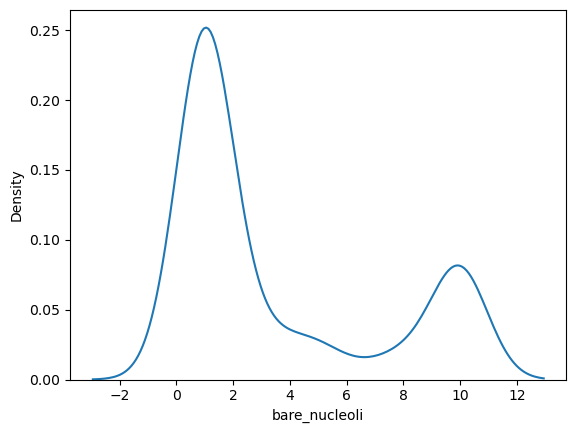

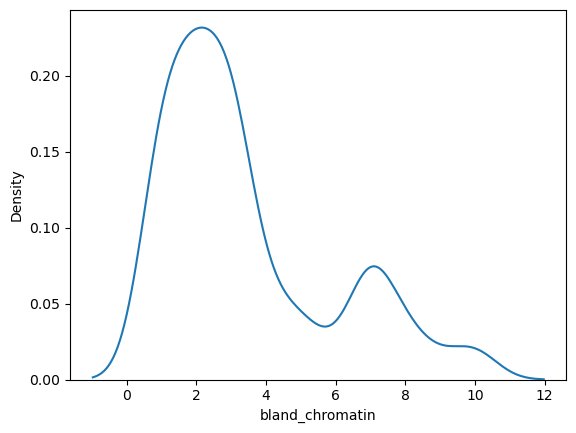

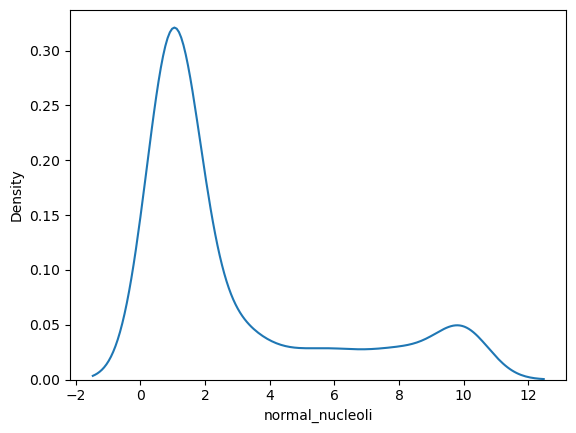

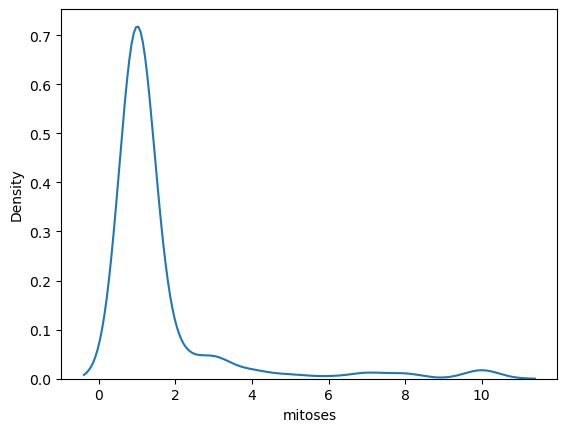

In [19]:
#Checking for distribution plot

for col in cols:
    sns.kdeplot(data=df[col])
    plt.show()

In [20]:
#Segregating dependent and independent variables

X=df.drop('class',axis=1)
y=df['class']

In [21]:
X.shape,y.shape

((699, 9), (699,))

In [22]:
#Train and Test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((594, 9), (105, 9), (594,), (105,))

In [23]:
#Scaling the Data

mn=MinMaxScaler()
X_train_scaled=mn.fit_transform(X_train)
X_test_scaled=mn.transform(X_test)

In [24]:
#Model Building

In [25]:
classifier=Sequential()

In [26]:
X_train_scaled.shape,y_train.shape

((594, 9), (594,))

In [27]:
classifier.add(Dense(16,kernel_initializer='uniform',activation='relu',input_dim=9))
classifier.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

In [28]:
classifier.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


In [30]:
es=EarlyStopping(monitor='loss',patience=3)

In [31]:
h_callback=classifier.fit(X_train_scaled,y_train,batch_size=10,epochs=100,validation_data=[X_train_scaled,y_train],callbacks=es)

Epoch 1/100
60/60 [==============================] - 1s 7ms/step - loss: 0.6864 - accuracy: 0.6835 - val_loss: 0.6804 - val_accuracy: 0.6515
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.6515 - val_loss: 0.6710 - val_accuracy: 0.6515
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6673 - accuracy: 0.6515 - val_loss: 0.6637 - val_accuracy: 0.6515
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 0.6608 - accuracy: 0.6515 - val_loss: 0.6578 - val_accuracy: 0.6515
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6554 - accuracy: 0.6515 - val_loss: 0.6527 - val_accuracy: 0.6515
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6505 - accuracy: 0.6515 - val_loss: 0.6480 - val_accuracy: 0.6515
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 0.6458 - accuracy: 0.6515 - val_loss: 0.6432 - val_accuracy: 0.6515
Epoch 8/100
6

Epoch 59/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1081 - accuracy: 0.9663 - val_loss: 0.1073 - val_accuracy: 0.9680
Epoch 60/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1071 - accuracy: 0.9680 - val_loss: 0.1063 - val_accuracy: 0.9680
Epoch 61/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1061 - accuracy: 0.9663 - val_loss: 0.1054 - val_accuracy: 0.9680
Epoch 62/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1053 - accuracy: 0.9663 - val_loss: 0.1046 - val_accuracy: 0.9663
Epoch 63/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1044 - accuracy: 0.9663 - val_loss: 0.1037 - val_accuracy: 0.9663
Epoch 64/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1036 - accuracy: 0.9680 - val_loss: 0.1030 - val_accuracy: 0.9663
Epoch 65/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1028 - accuracy: 0.9663 - val_loss: 0.1022 - val_accuracy: 0.9663
Epoch 

In [32]:
y_pred_train=classifier.predict(X_train_scaled)

19/19 [==============================] - 0s 1ms/step


In [33]:
y_pred_train=np.round(y_pred_train)

In [34]:
y_pred_test=classifier.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [35]:
y_pred_test=np.round(y_pred_test)

In [36]:
print('Model Train Accuracy is: ',accuracy_score(y_train,y_pred_train))
print('Model Test Accuracy is: ',accuracy_score(y_test,y_pred_test))
print('Model Recall_score is: ',recall_score(y_test,y_pred_test))
print('Model Precision_score is: ',precision_score(y_test,y_pred_test))
print('Model f1_score is: ',f1_score(y_test,y_pred_test))

Model Train Accuracy is:  0.9629629629629629
Model Test Accuracy is:  0.9428571428571428
Model Recall_score is:  0.8529411764705882
Model Precision_score is:  0.9666666666666667
Model f1_score is:  0.90625


In [37]:
h_callback.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

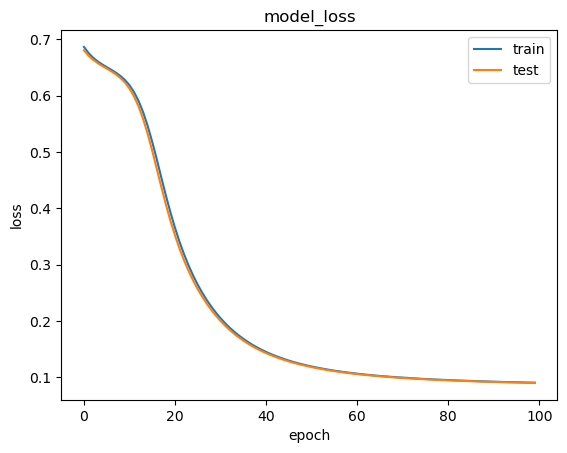

In [38]:
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

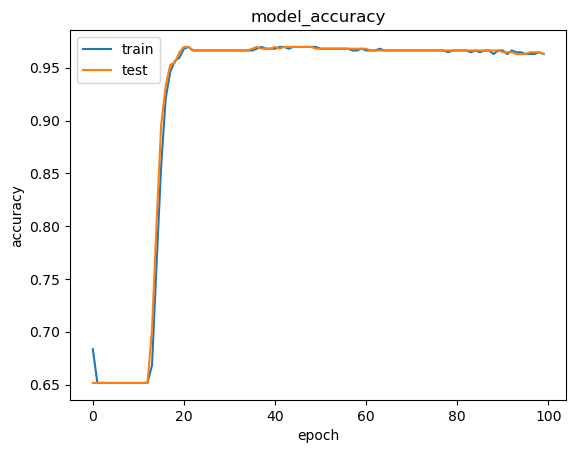

In [39]:
plt.plot(h_callback.history['accuracy'])
plt.plot(h_callback.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [40]:
#final parameters

final_parameters = classifier.get_weights()

for i, parameters in enumerate(final_parameters):
    print(f"Layer {i + 1} - Shape: {parameters.shape}")
    print(parameters)
    print()

Layer 1 - Shape: (9, 16)
[[ 5.29987412e-03 -7.96399079e-03  7.00024009e-01 -6.27294183e-02
   2.54415330e-02  2.10141227e-01 -6.04355372e-02  1.68274939e-02
  -5.56796789e-02 -4.34971526e-02 -4.49747518e-02 -5.06642391e-04
  -2.45955633e-03 -3.41346227e-02  1.39153330e-02  2.12588191e-01]
 [ 4.32606265e-02 -1.25152040e-02  7.34948993e-01 -6.64589927e-02
   3.00772674e-02  1.99540734e-01 -7.28464797e-02 -5.96797913e-02
  -1.16631664e-01 -1.16676256e-01 -4.63658152e-03 -5.91622181e-02
  -1.03982342e-02  1.91500783e-02 -2.33251285e-02  2.61211634e-01]
 [-2.76625734e-02  4.45550829e-02  7.63199329e-01 -3.12028583e-02
  -2.08949391e-02  2.26668030e-01 -1.45378917e-01 -3.78560051e-02
  -1.18253283e-01 -8.00854787e-02 -6.75746892e-03 -3.35372705e-03
  -1.03051579e-02 -2.02064477e-02 -6.91023096e-02  2.22945884e-01]
 [-4.94896434e-02 -4.89103086e-02  5.11822641e-01 -2.04157196e-02
  -3.94954793e-02  1.62607715e-01 -8.82645771e-02  2.25432049e-02
  -8.69952589e-02 -7.44059458e-02 -5.72003685e-0